In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000          1
17   15617

In [3]:
X = data.iloc[:,[2,3]].values
Y = data.iloc[:,4].values

In [4]:
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [5]:
# feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# fit the classifier
classifier = RandomForestClassifier(n_estimators = 10000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
# Predict the results
Y_pred = classifier.predict(X_test)

In [8]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[63  5]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


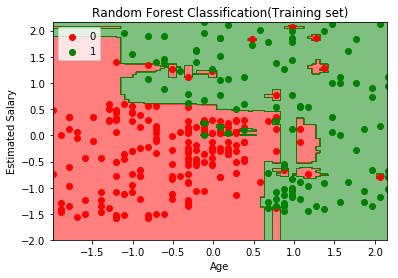

In [9]:
# Visualising the training set results
X1, X2 = np.meshgrid(np.arange(start = X_train[:,0].min(), stop = X_train[:,0].max(), step = 0.01),
                     np.arange(start = X_train[:,0].min(), stop = X_train[:,0].max(), step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1], c= ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend() 
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


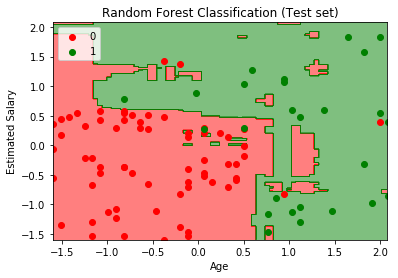

In [10]:
# Visualising the test set results
X1, X2 = np.meshgrid(np.arange(start = X_test[:,0].min(), stop = X_test[:,0].max(), step = 0.01),
                     np.arange(start = X_test[:,0].min(), stop = X_test[:,0].max(), step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1], c= ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend() 
plt.show()